In [1]:
import shap
import sklearn

/Users/vasu_mac/src/github_repos/Default/shap_tutorials/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


In [16]:
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)
features = X.columns
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(features[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


In [19]:
X_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X)
model_scaled = sklearn.linear_model.LinearRegression()
model_scaled.fit(X_scaled, y)
print("Model (trained on normalized input) coefficients:\n")
for i in range(len(features)):
    print(features[i], "=", model_scaled.coef_[i].round(5))

Model (trained on normalized input) coefficients:

MedInc = 0.79866
HouseAge = 0.1299
AveRooms = -0.33091
AveBedrms = 0.38641
Population = 0.03178
AveOccup = -0.23006
Latitude = -1.00069
Longitude = -0.9319


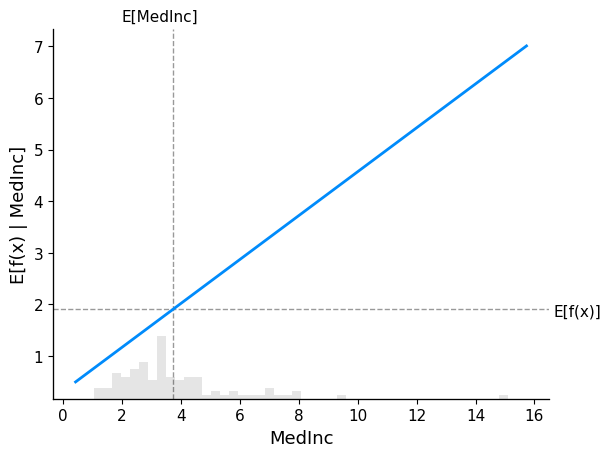

In [5]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)


ExactExplainer explainer: 1001it [00:10, 10.79it/s]                                  


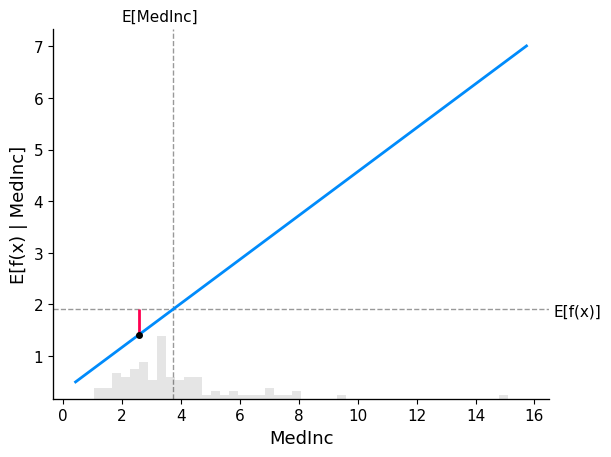

In [6]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

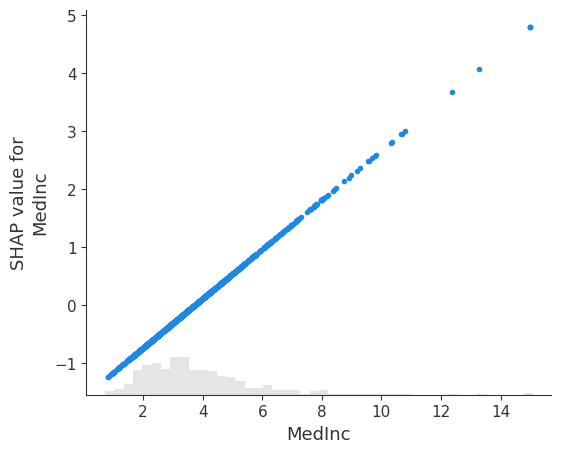

In [7]:
shap.plots.scatter(shap_values[:, "MedInc"])

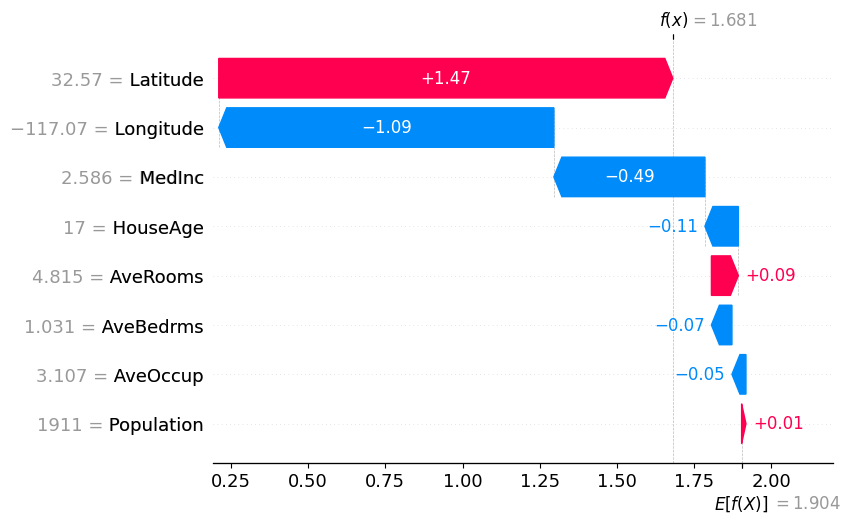

In [8]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)